# [DermaMNIST](https://challenge.isic-archive.com/data/) - ISIC Challenge 2018
# Dataset preprocessing
## Mesterházi Marcell

In [2]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
dataset = pd.read_csv("datasets/hmnist_28_28_RGB.csv")

In [3]:
dataset.shape

(10015, 2353)

In [4]:
dataset

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [5]:
# Separate out our target values

y_dataset = dataset['label']

# delete value column

del dataset['label']
dataset.shape

(10015, 2352)

In [6]:
def split_data(X, Y, v_ratio=0.2, t_ratio=0.1):
  v_split = int(X.shape[0]*(1-v_ratio-t_ratio))
  t_split = int(X.shape[0]*(1-t_ratio))
  X_train, Y_train  = X[0:v_split],       Y[0:v_split]
  X_valid, Y_valid  = X[v_split:t_split], Y[v_split:t_split]
  X_test , Y_test   = X[t_split:],        Y[t_split:]
  return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

In [8]:
x_dataset = dataset.values

X_train, Y_train, X_valid, Y_valid, X_test, Y_test = split_data(x_dataset, y_dataset)

print("Train: {} samples".format(len(X_train)))
print("Validation: {} samples".format(len(X_valid)))
print("Test: {} samples".format(len(X_test)))

Train: 7010 samples
Validation: 2003 samples
Test: 1002 samples


### Trying out on one example (301st image and its label)

label: 2


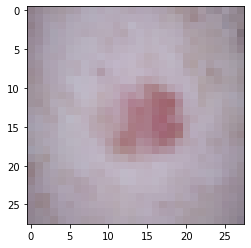

In [9]:
import matplotlib.pyplot as plt

tmp_image = x_dataset[300].reshape(28,28,3)
plt.imshow(tmp_image)
print("label: {}".format(y_dataset[300]))